<a href="https://colab.research.google.com/github/Nsho0724/signate_phone/blob/main/price_range_EDA_%E5%A4%96%E3%82%8C%E5%80%A4_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
path = "/content/drive/My Drive/SIGNATE/compe01/"
train = pd.read_csv(path + "train.csv")
test = pd.read_csv(path + "test.csv")
sample_submission = pd.read_csv(path + "sample_submission.csv")

In [81]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_row', 1000000)

In [82]:
print(train.shape)
print(test.shape)

(1200, 22)
(800, 21)


In [83]:
train_df = train
test_df = test

In [84]:
train_df.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [85]:
test_df.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [86]:
train_df.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [87]:
test_df.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [88]:
train_df.head(5)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,1203,0,0.680981,1,1,1,23,0.402580,117,3,2,1331,721,1970,15,1,4,1,0,1,2
1,3,1203,1,2.602754,1,0,0,8,0.415612,194,1,19,1571,1262,1150,14,16,14,1,0,1,3
2,4,1980,1,2.604065,1,0,0,6,0.858110,122,2,15,364,721,1970,18,12,11,1,0,1,1
3,5,1185,1,2.669403,1,3,0,33,0.027065,132,8,4,447,1162,1950,15,3,19,1,0,0,2
4,7,1203,1,2.375453,0,4,1,12,0.141485,135,6,5,364,1917,1970,16,7,6,1,1,1,0


In [89]:
test_df.head(5)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1203,0,0.498993,1,0,1,40,0.914530,190,8,7,381,721,1970,6,1,2,1,0,1
1,2,1154,0,1.981014,0,1,0,33,0.025999,82,6,10,376,1555,1970,11,7,3,1,0,0
2,6,1027,1,1.647026,0,0,1,32,0.912318,103,6,1,364,1374,1970,17,1,6,1,0,0
3,10,833,0,1.070061,0,0,0,2,0.033010,156,7,0,1331,1710,832,12,8,8,1,1,0
4,12,1027,1,1.859165,0,4,1,2,0.612349,171,1,13,667,1642,2655,14,5,2,1,1,0


In [90]:
features = ['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range']

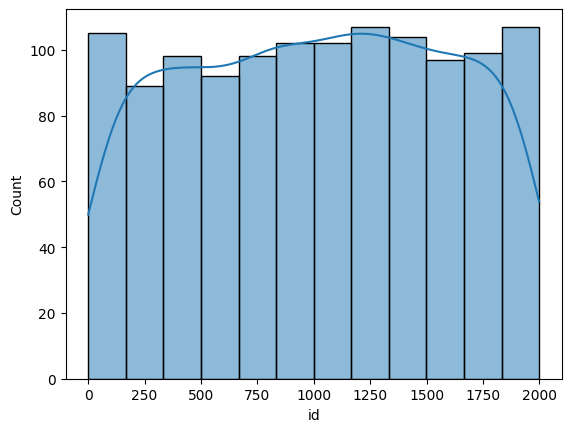

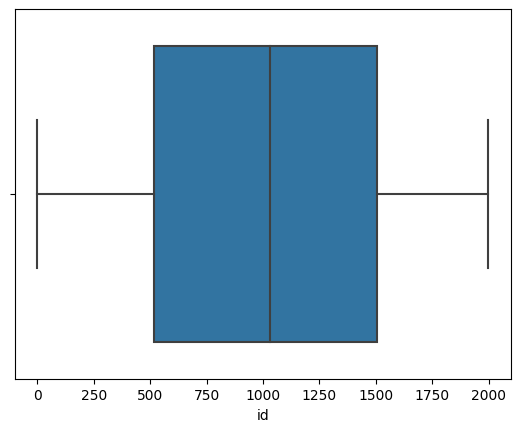

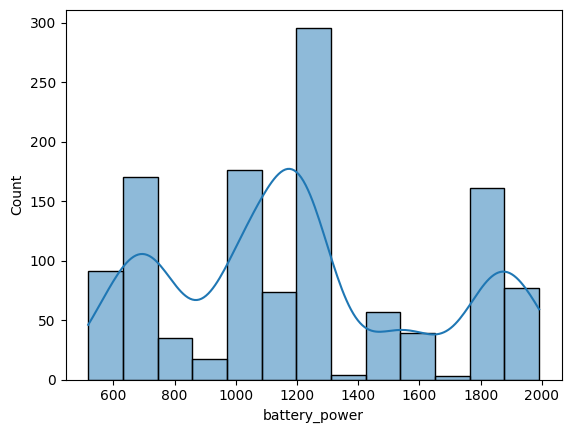

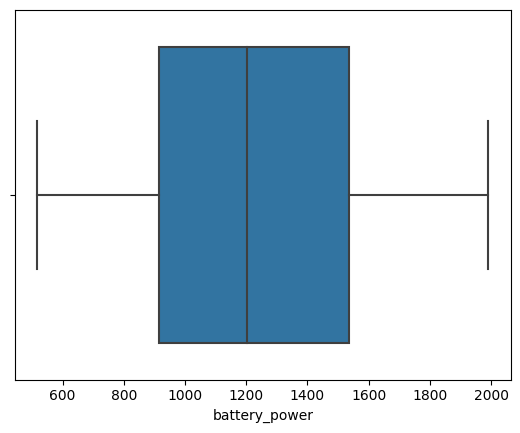

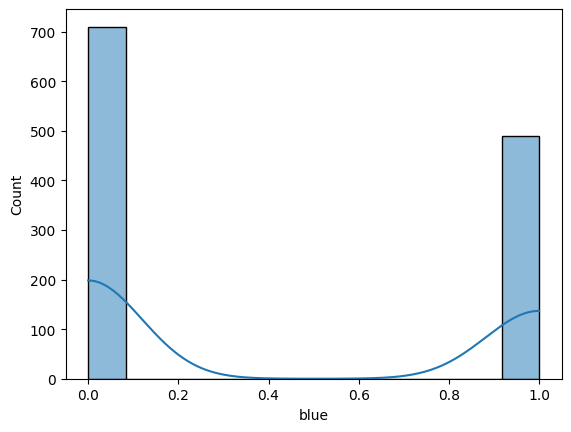

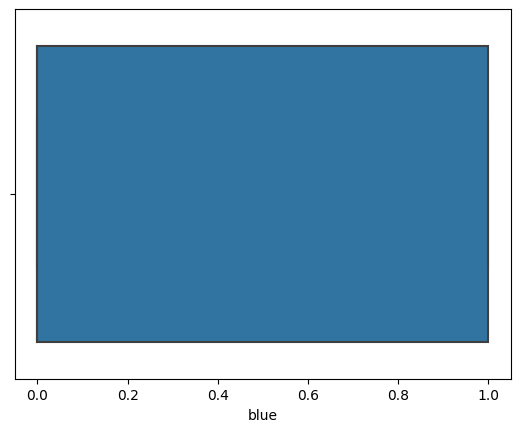

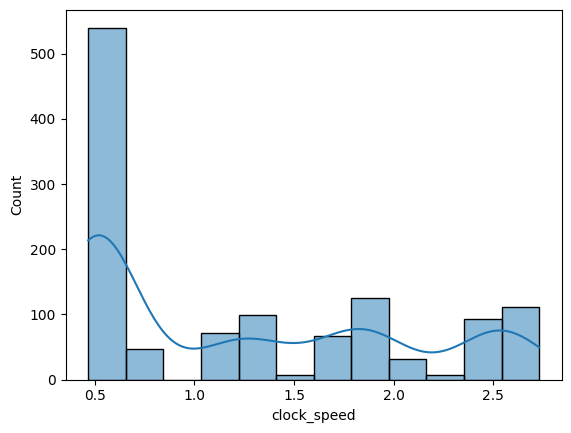

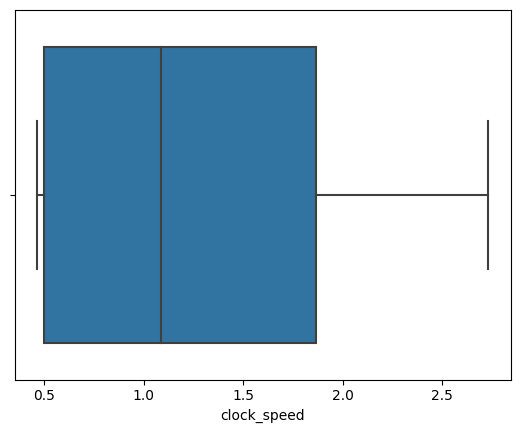

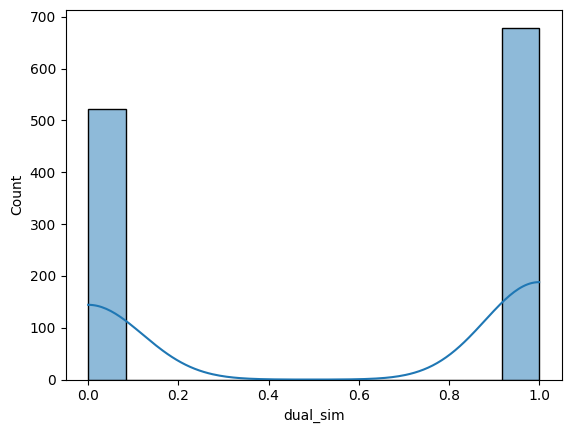

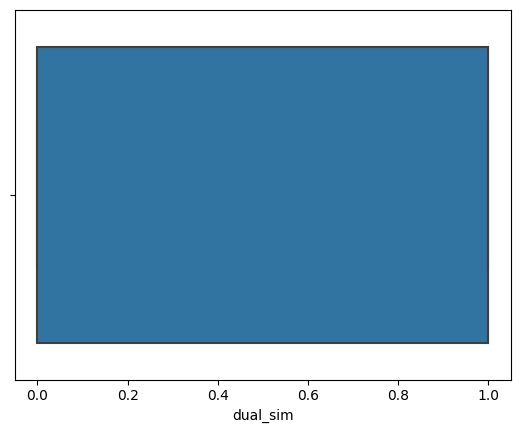

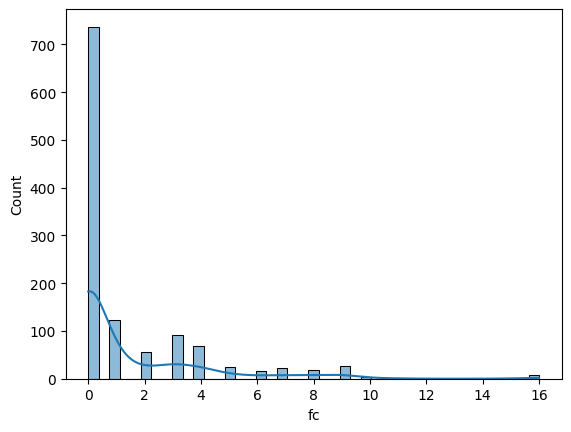

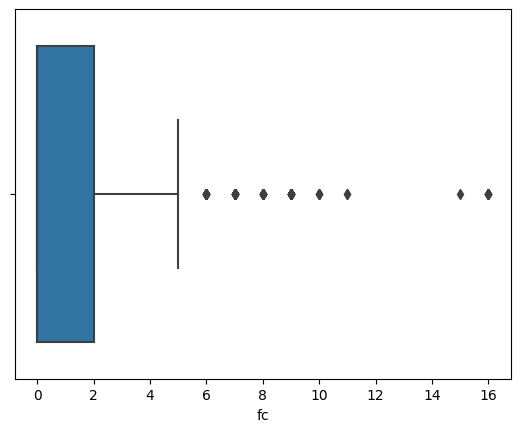

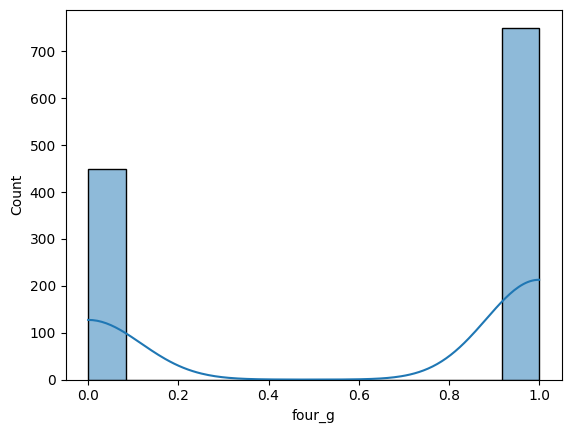

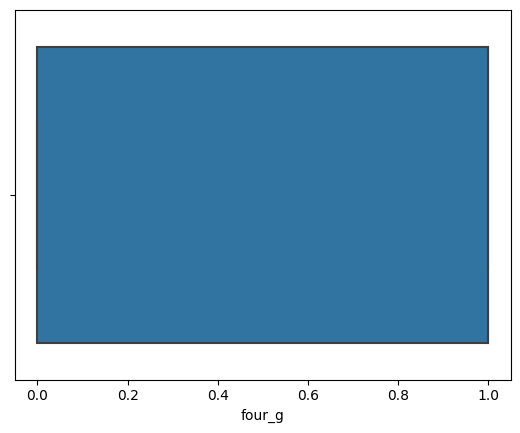

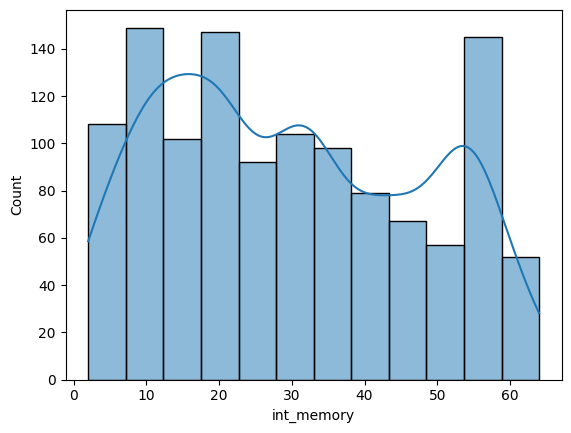

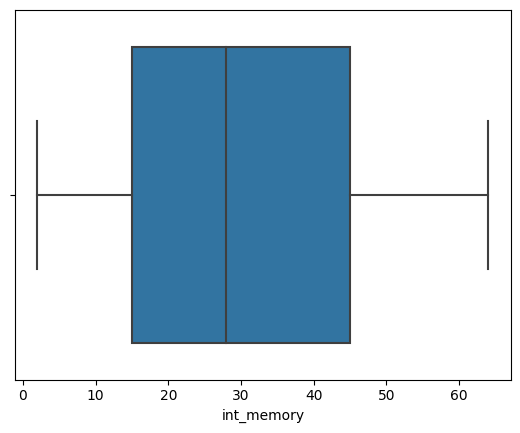

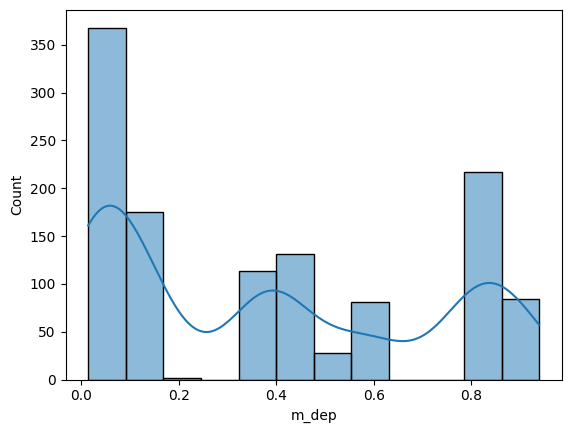

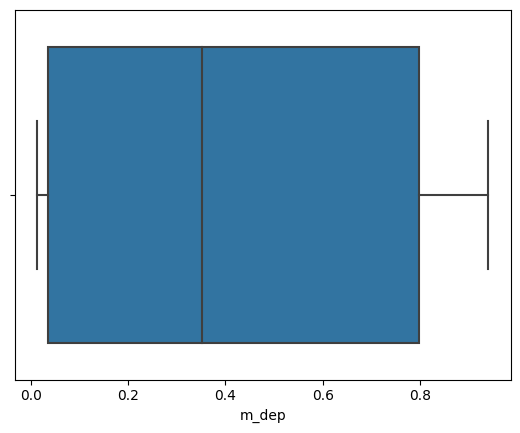

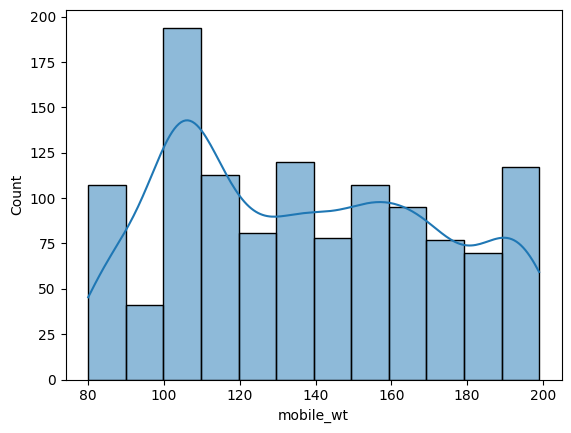

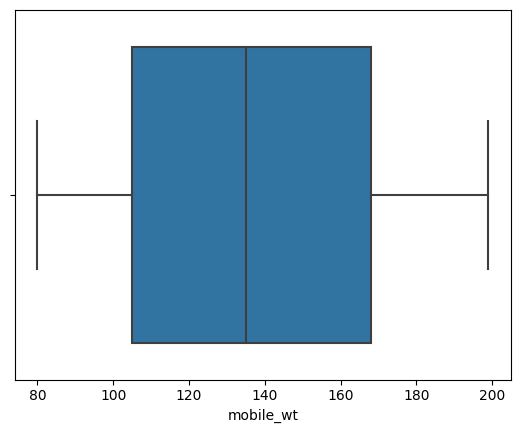

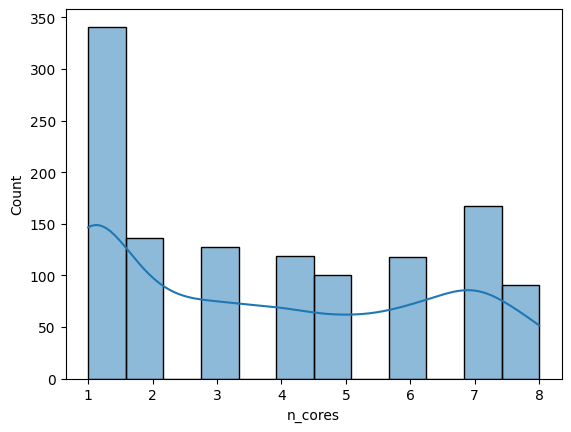

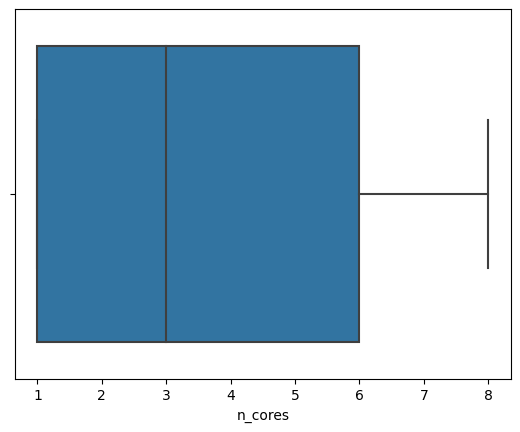

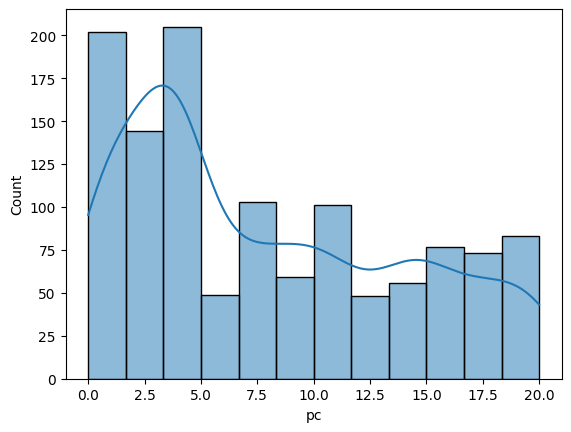

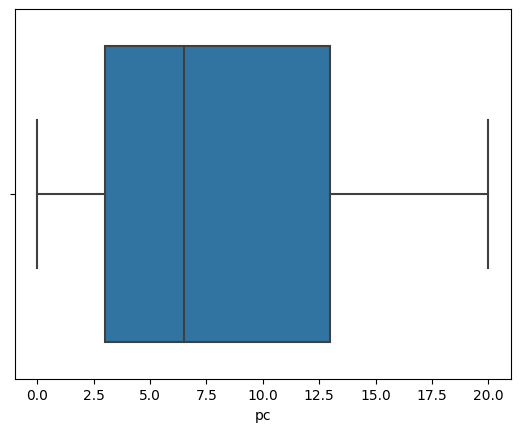

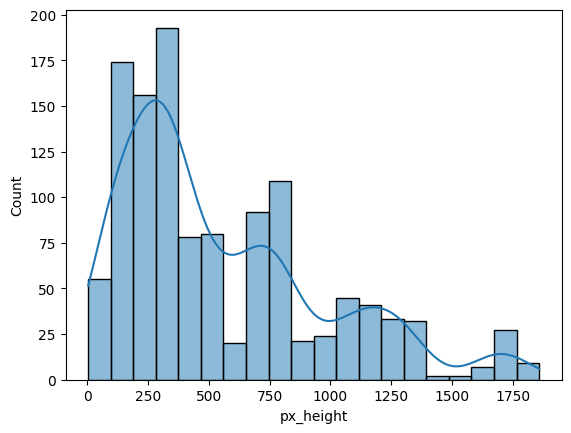

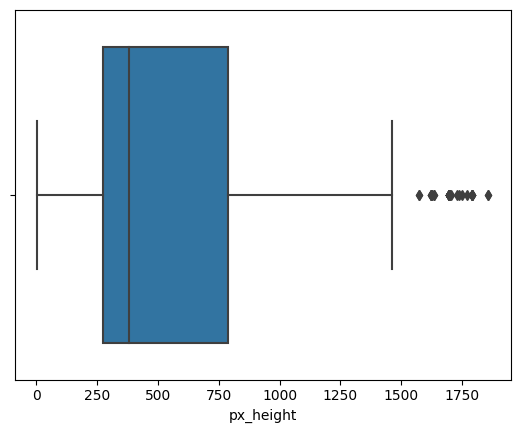

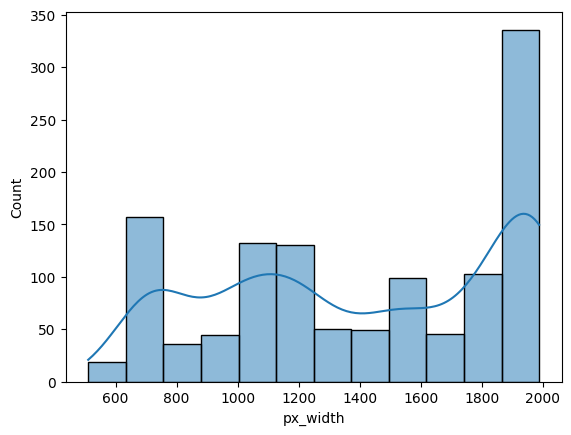

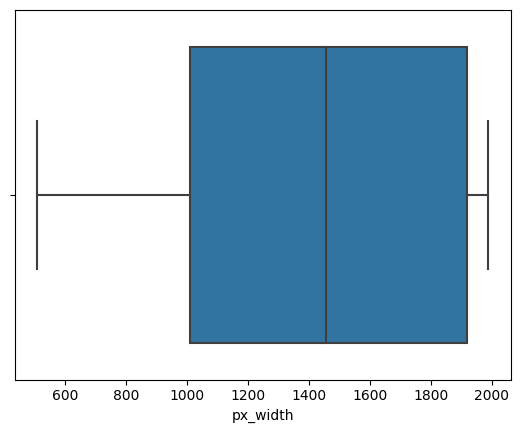

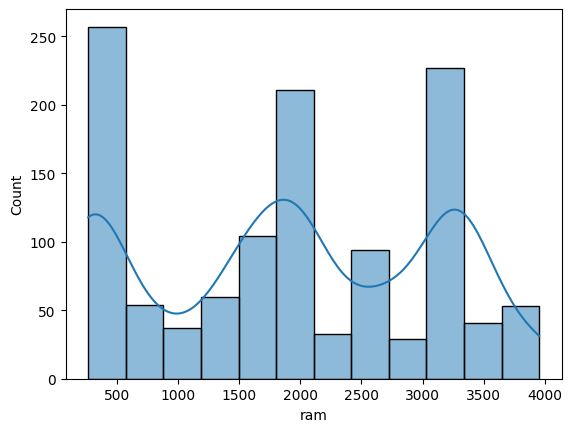

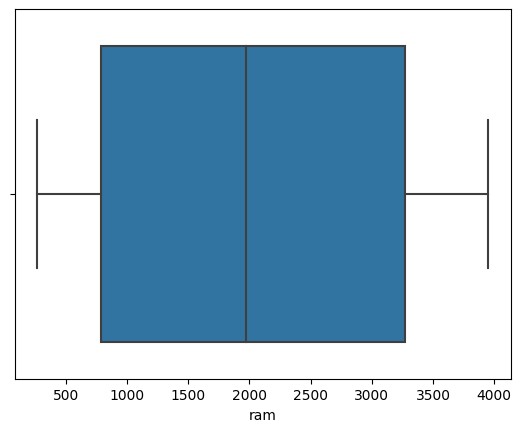

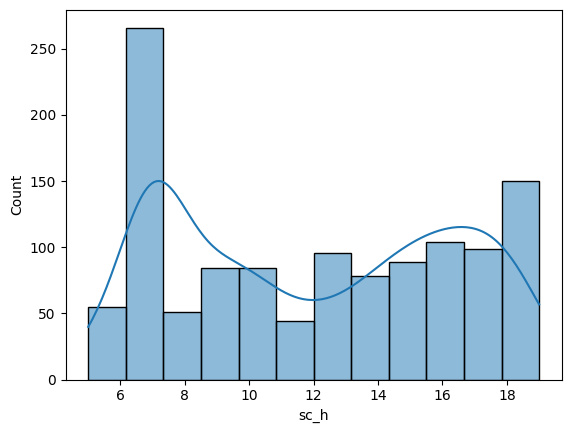

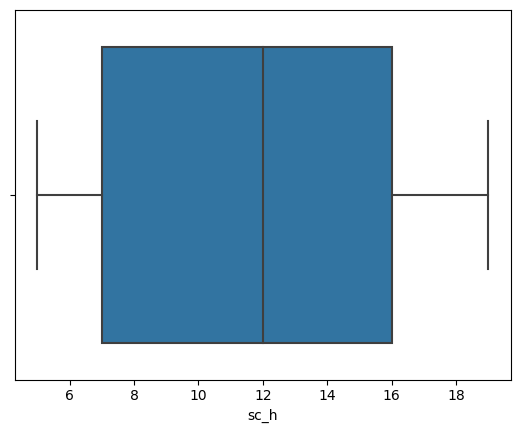

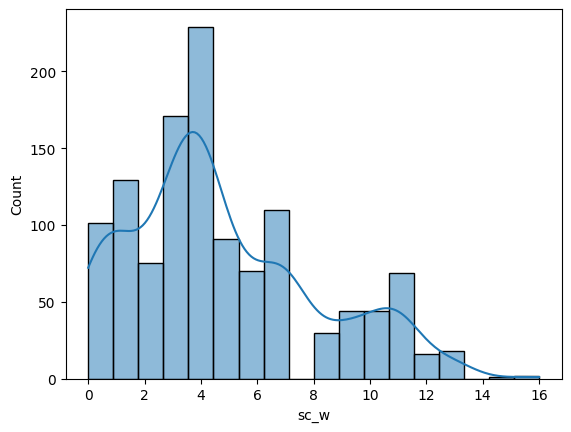

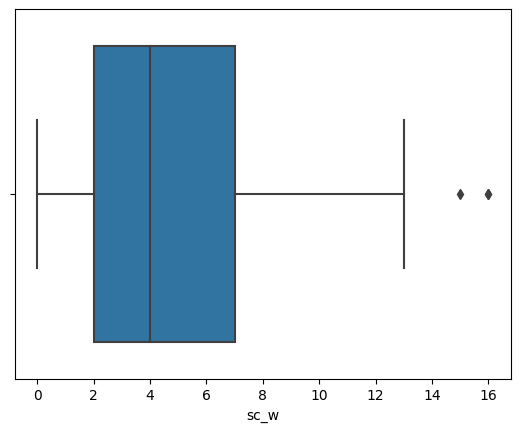

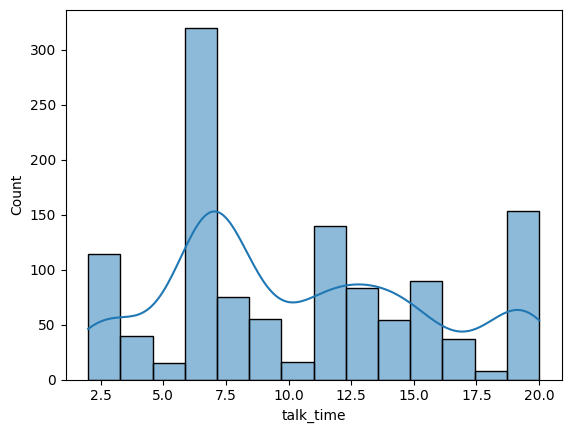

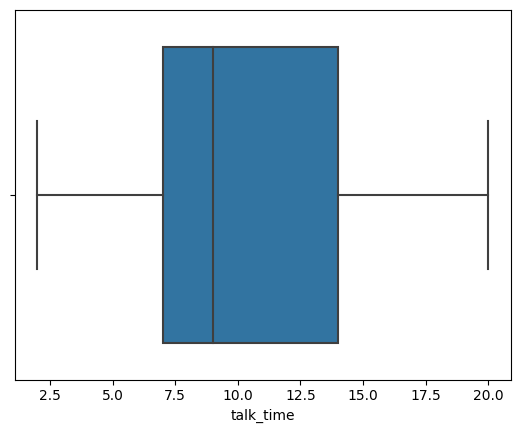

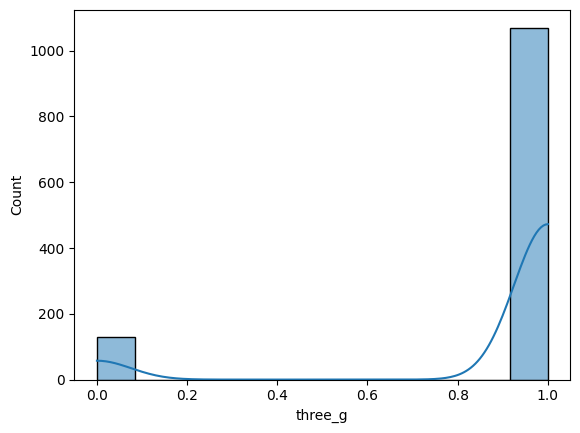

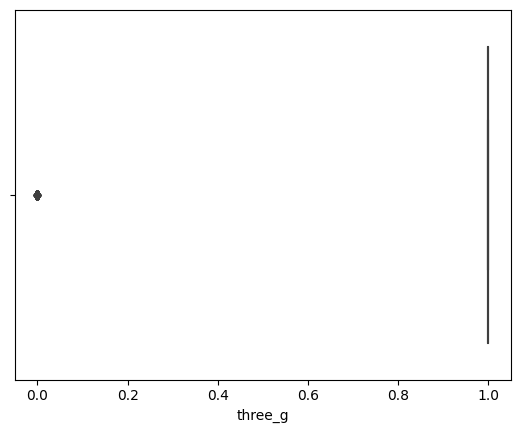

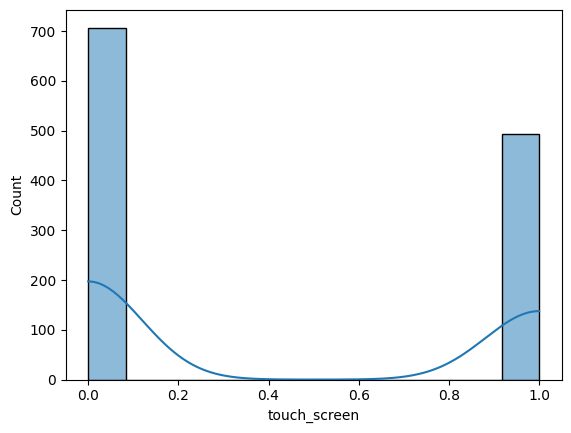

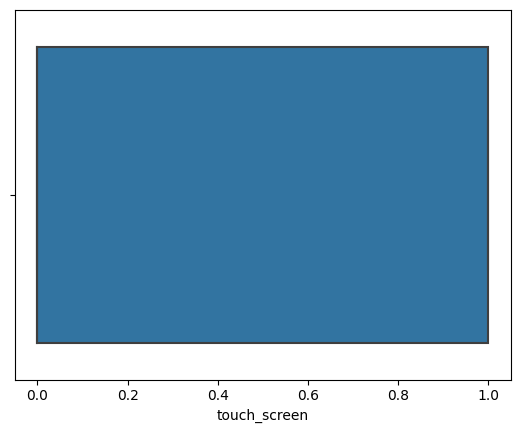

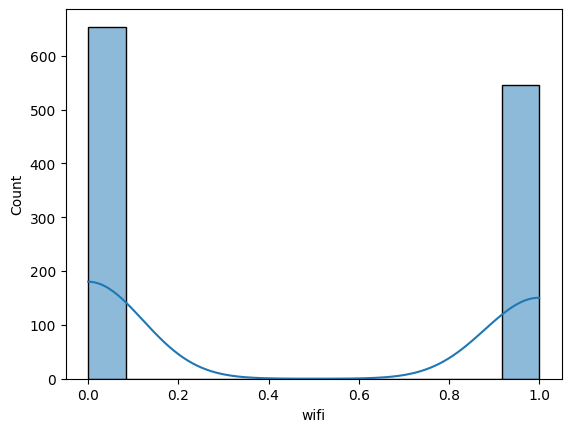

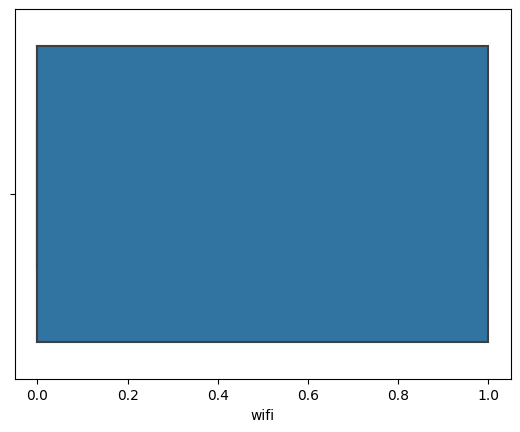

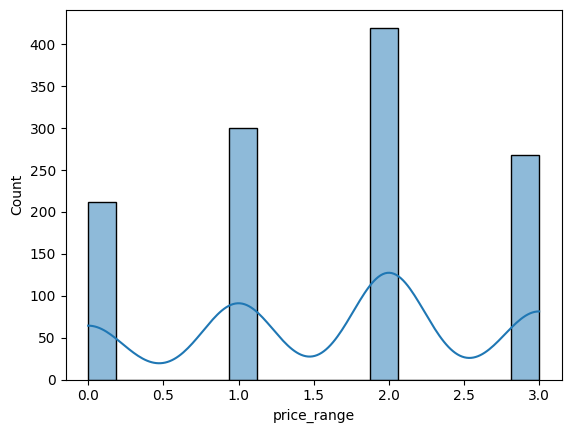

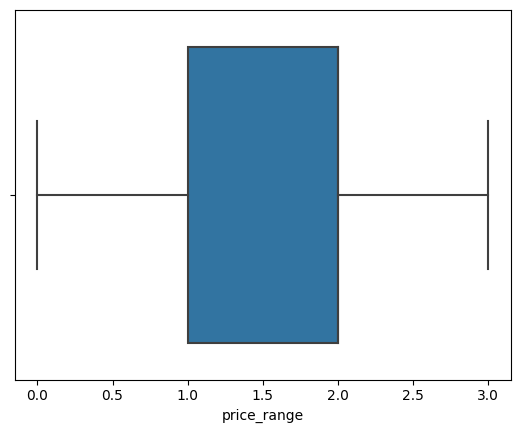

In [91]:
for feature in features:
  sns.histplot(data = train, x = feature, kde = True)
  plt.show()
  sns.boxplot(data = train, x = feature)
  plt.show()

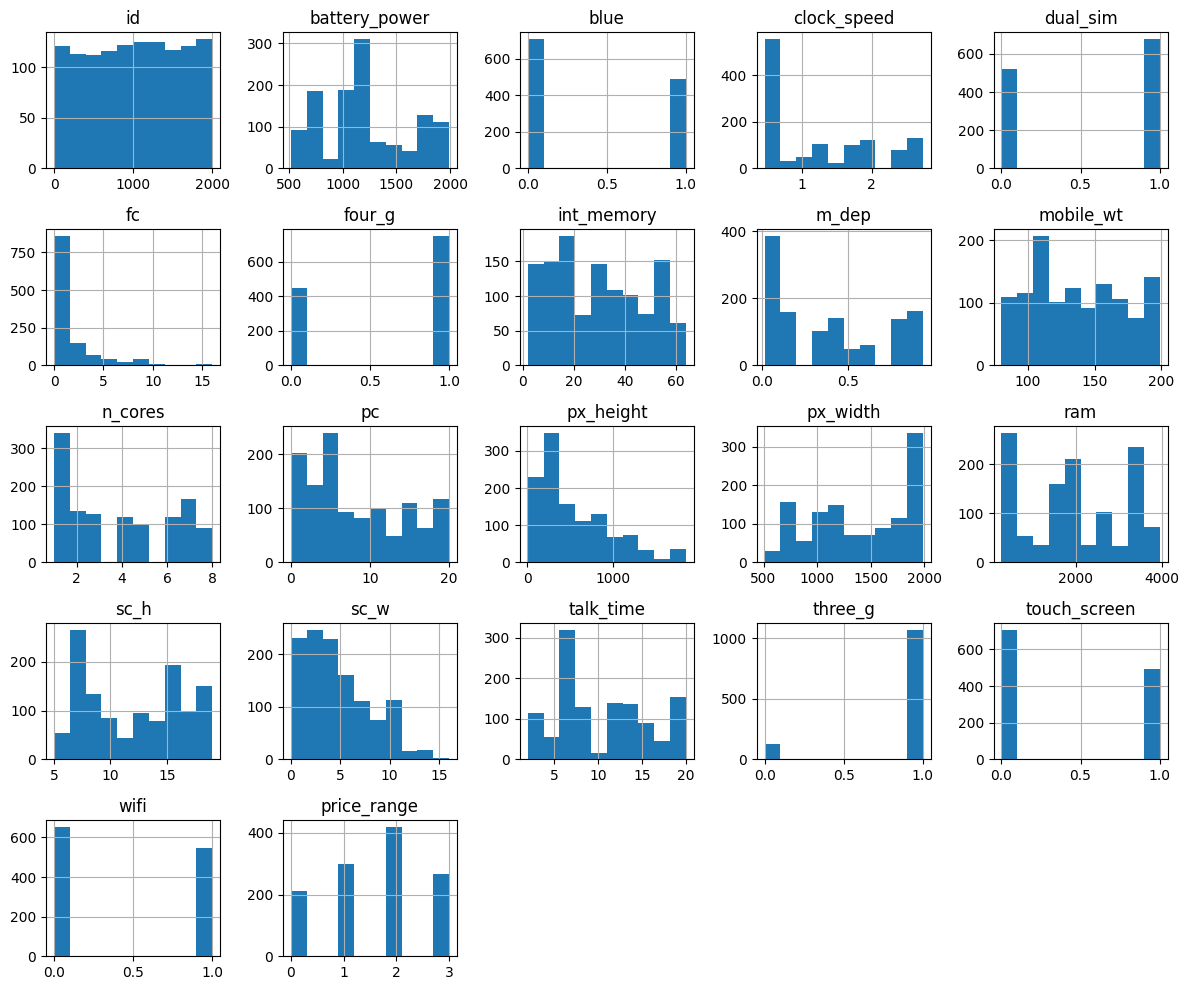

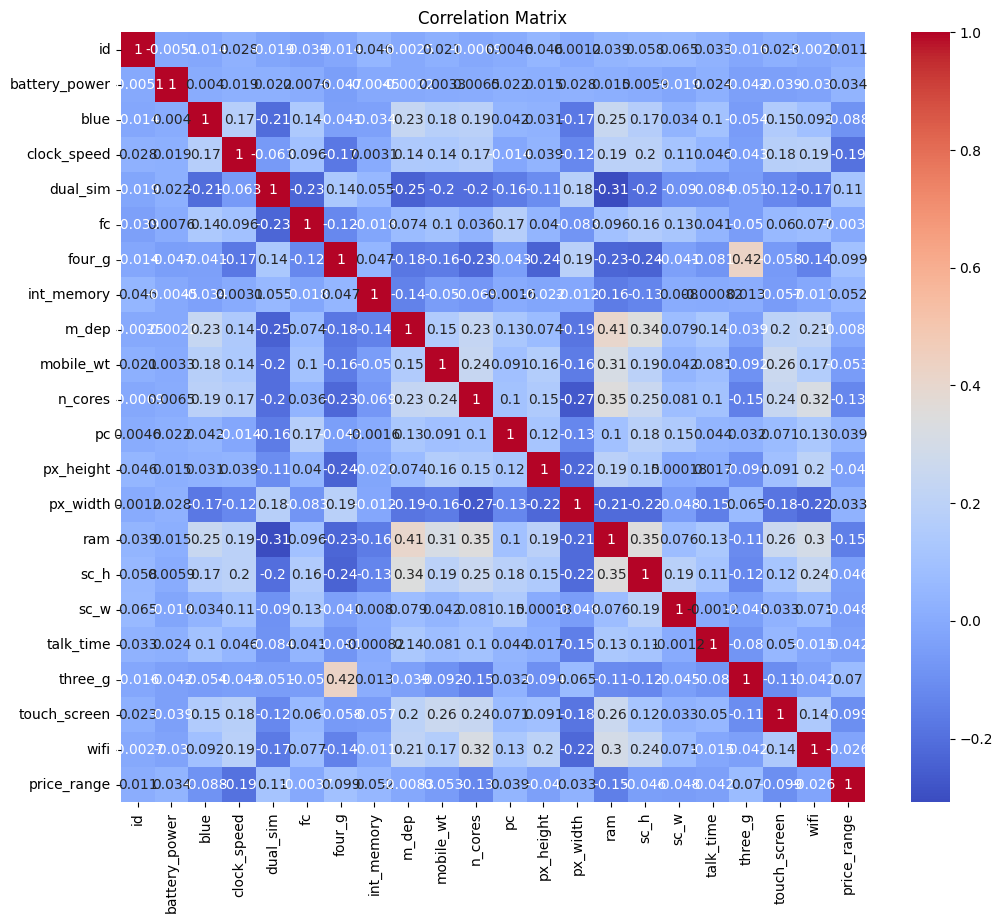

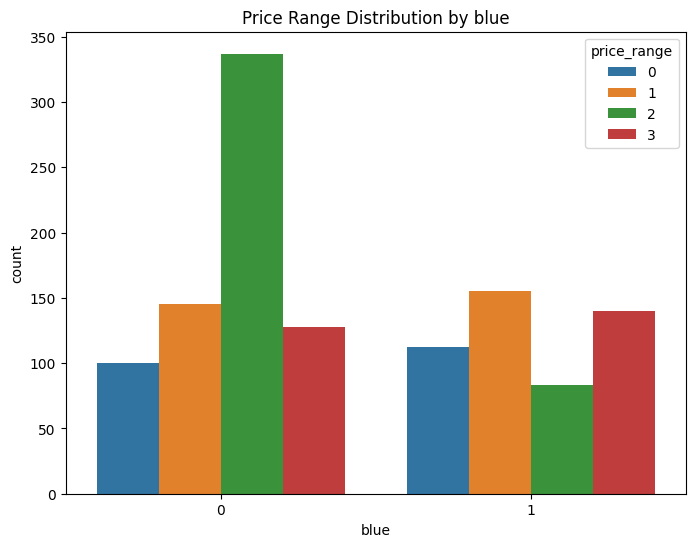

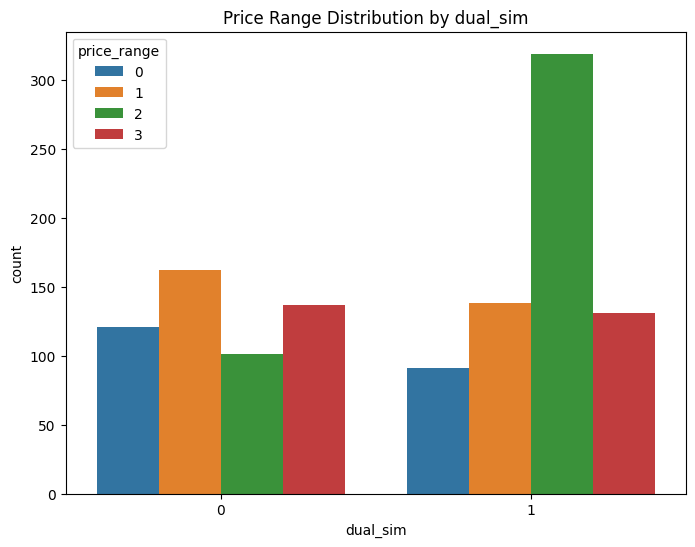

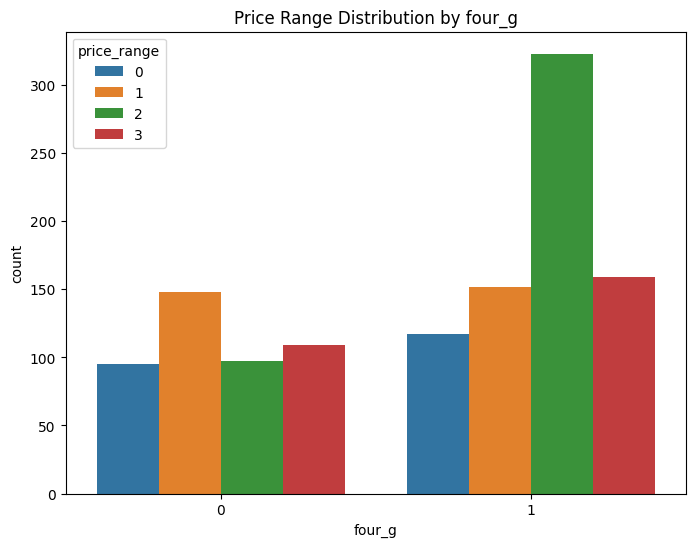

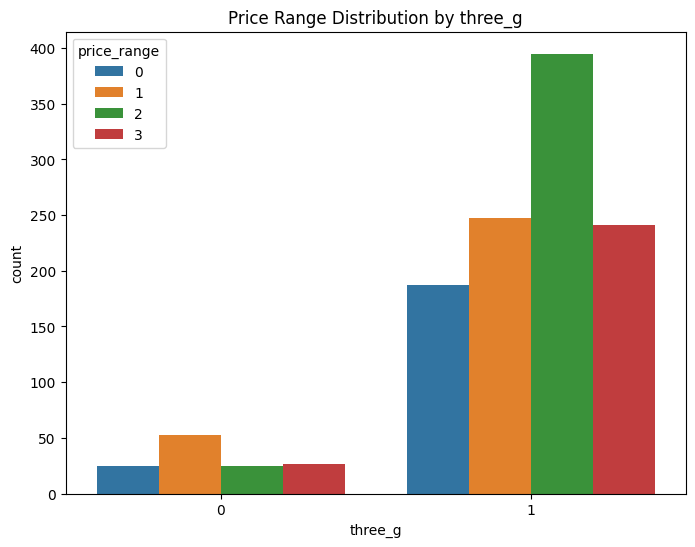

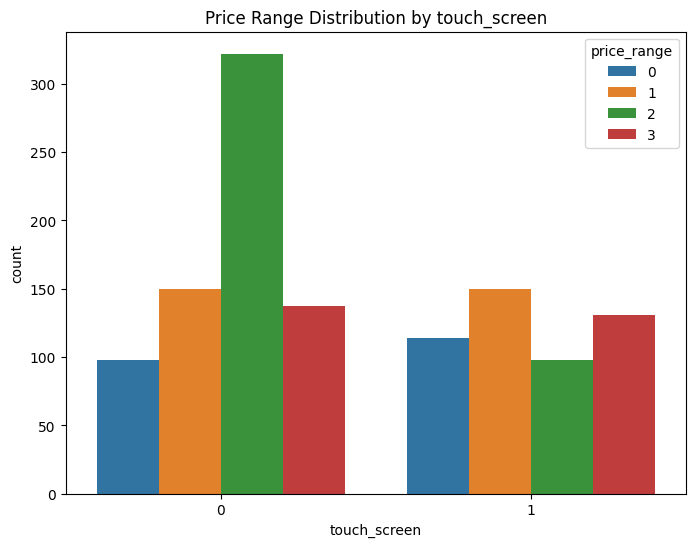

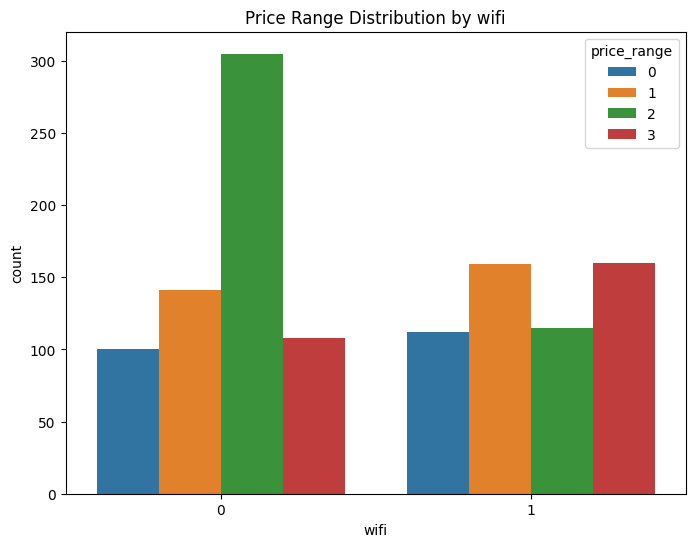

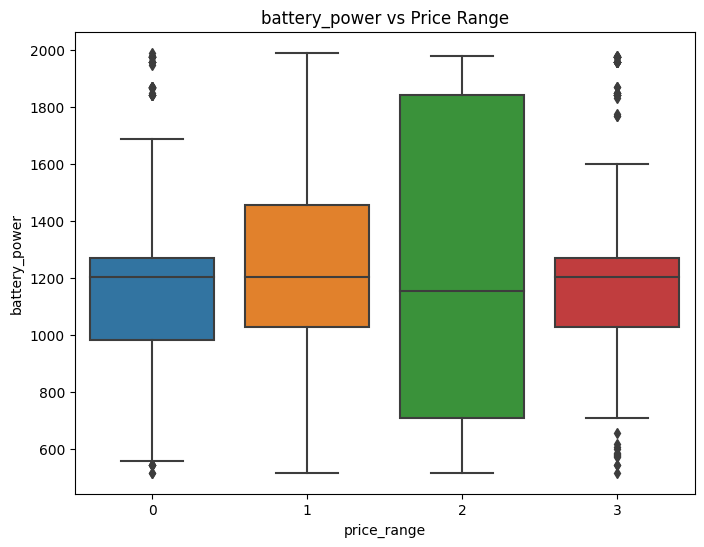

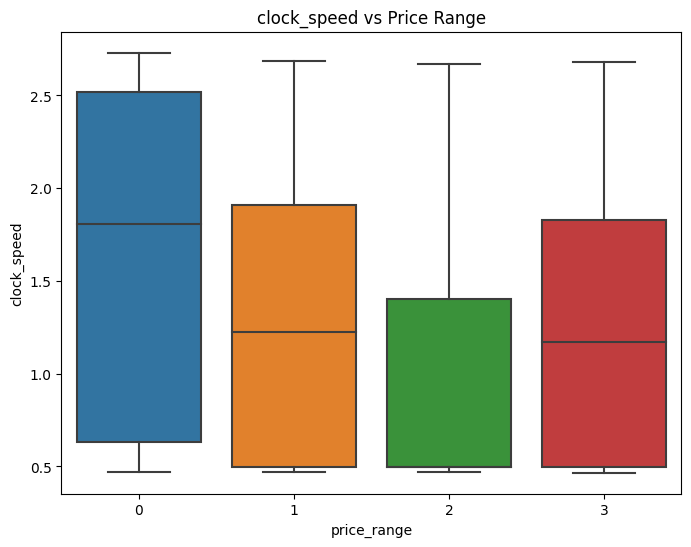

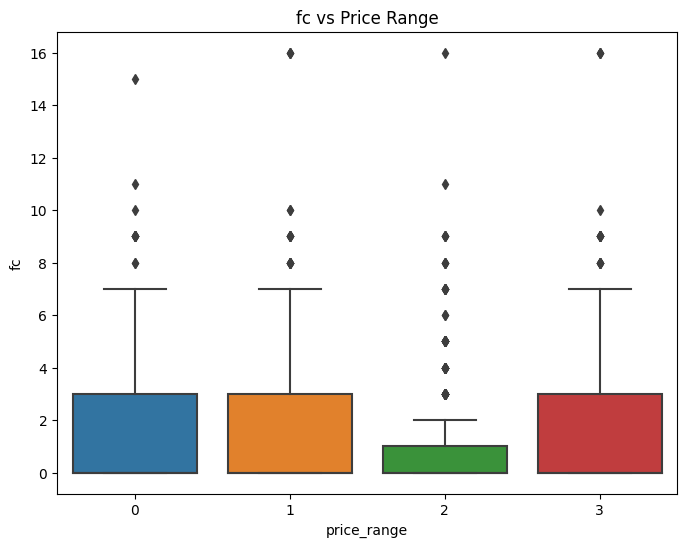

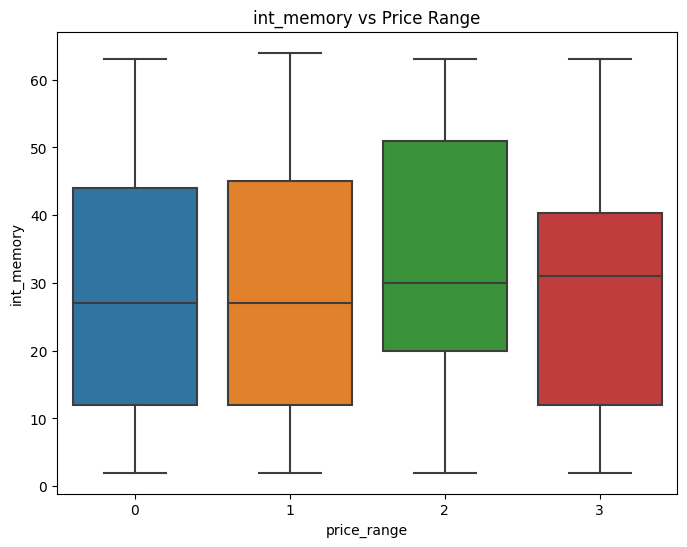

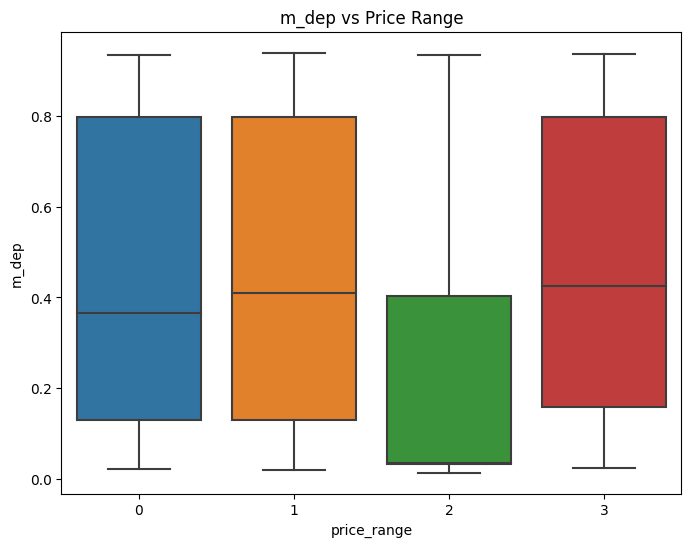

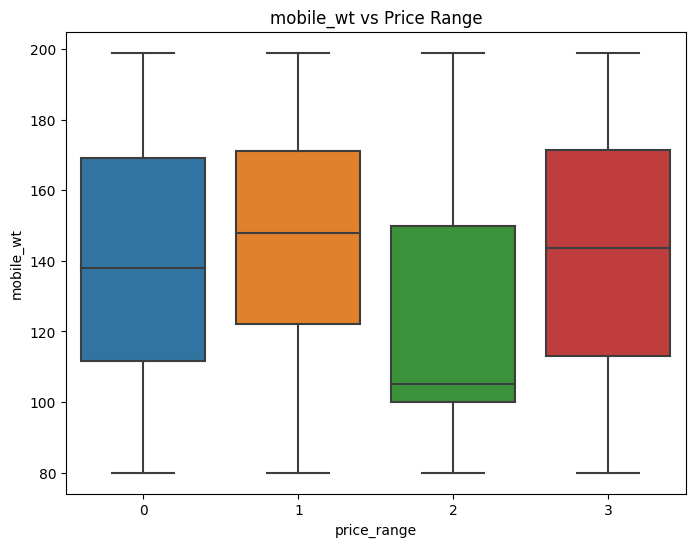

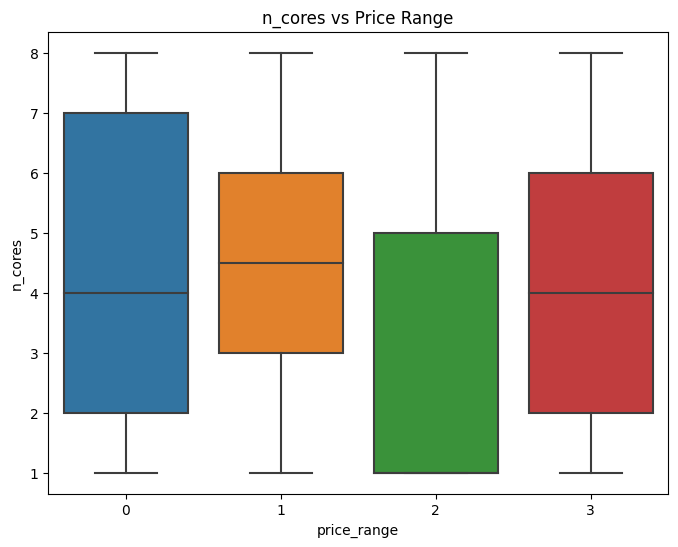

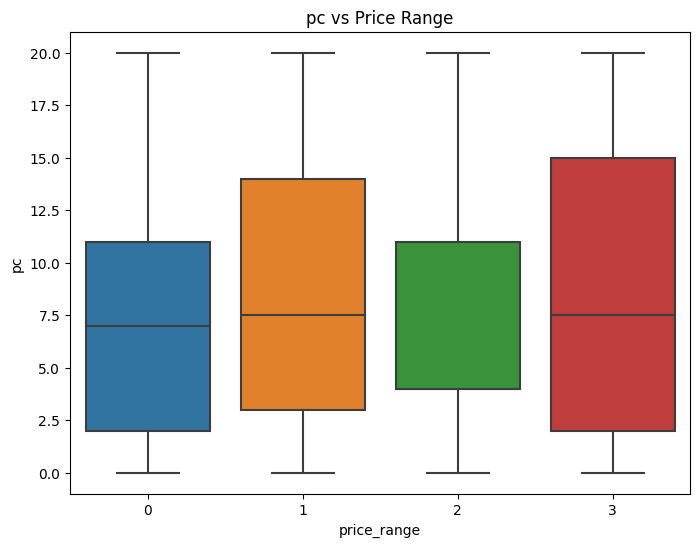

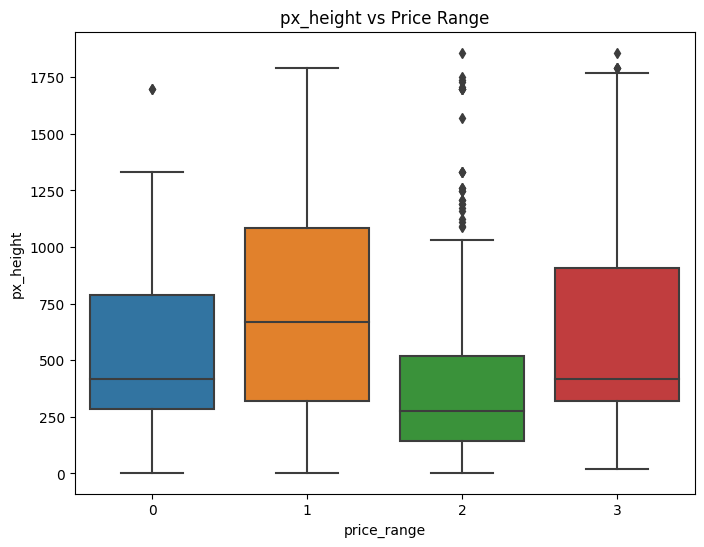

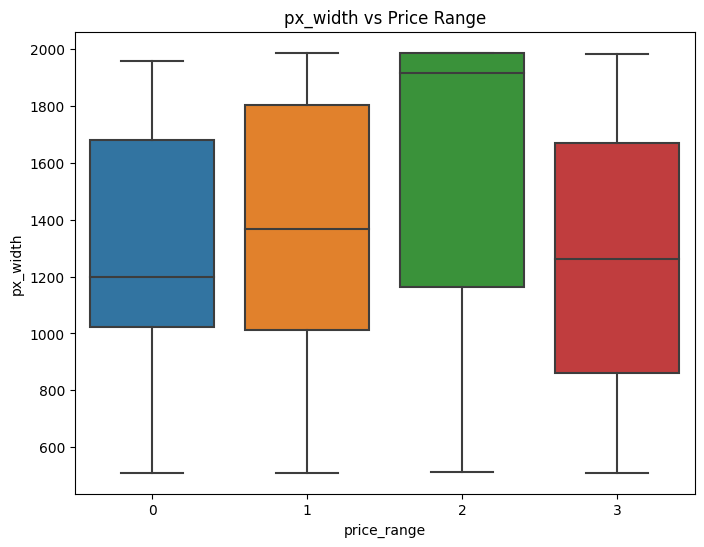

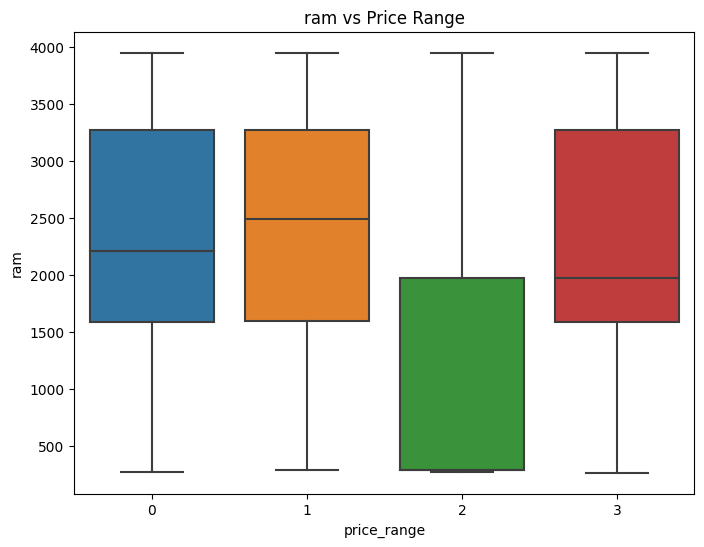

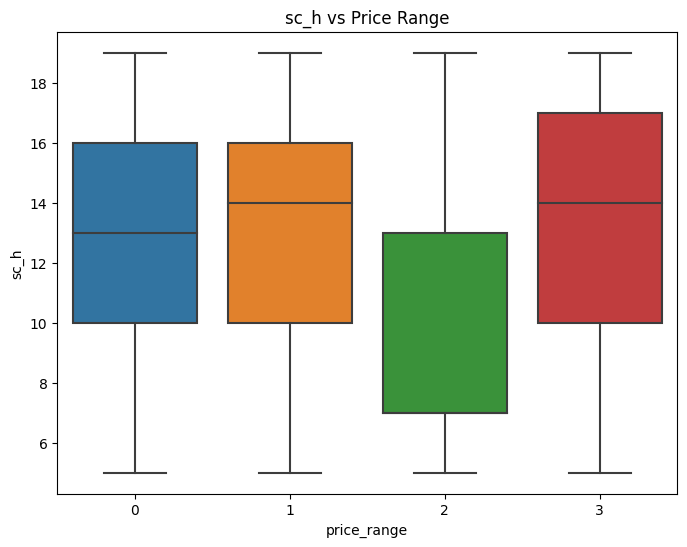

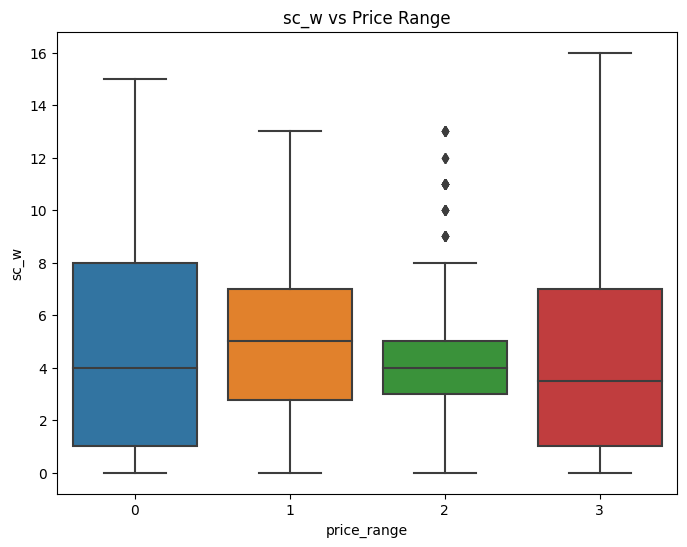

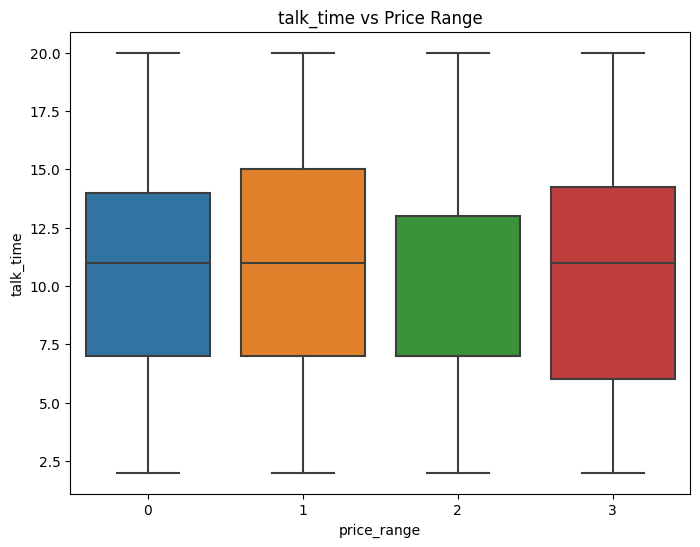

In [92]:
# ヒストグラムの作成
train_df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# 相関行列の作成とヒートマップの表示
corr_matrix = train_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# カテゴリごとの価格帯の分布を可視化
categorical_columns = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=train_df, x=column, hue='price_range')
    plt.title(f'Price Range Distribution by {column}')
    plt.show()

# 数値データと価格帯の関係を可視化
numerical_columns = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt',
                     'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=train_df, x='price_range', y=column)
    plt.title(f'{column} vs Price Range')
    plt.show()


In [93]:
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from sklearn.model_selection import  GridSearchCV 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [94]:
#説明変数と目的変数に分割
X = train.drop(["id","price_range"],axis = 1)
y = train["price_range"]
#標準化
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)
test_sc = scaler.fit_transform(test)

In [95]:
lg = LGBMClassifier()
lg.fit(X,y)
lg_scores = cross_validate(lg,X,y,scoring ="accuracy",cv =5)

In [96]:
rf = RandomForestClassifier()
# rf = RandomForestClassifier(n_estimators=100, random_state=42,max_depth= 20,min_samples_leaf=1)
rf.fit(X,y)
rf_scores = cross_validate(rf,X,y,scoring ="accuracy",cv =5)

In [97]:
svc = SVC()
svc.fit(X,y)
svc_scores = cross_validate(lg,X,y,scoring ="accuracy",cv =5)

In [98]:
xg = XGBClassifier()
# xgb_y = y-1
xg.fit(X,y)
xg_scores = cross_validate(xg,X,y,scoring ="accuracy",cv =5)

In [99]:
def model_scores(model_scores):
    for key in model_scores.keys():
        print(key + ' test scores: ', model_scores[key])
    print("Average test score: ", model_scores["test_score"].mean())

In [100]:
scores =[lg_scores,rf_scores,svc_scores,xg_scores]
scores_ =["LGBMClassifier","RandomForestClassifier","SVC","XGBClassifier"]

In [101]:
for i in range(len(scores)):
  print(scores_[i])
  model_scores(scores[i])
  print("\n")

LGBMClassifier
fit_time test scores:  [0.35226512 0.33734202 0.4041152  0.350945   0.33679342]
score_time test scores:  [0.00878692 0.00893569 0.00949788 0.0101068  0.01563263]
test_score test scores:  [0.44166667 0.46666667 0.475      0.48333333 0.47916667]
Average test score:  0.4691666666666666


RandomForestClassifier
fit_time test scores:  [0.31668067 0.32651067 0.31903839 0.31738639 0.31901526]
score_time test scores:  [0.01617026 0.01701117 0.01774025 0.01801443 0.01871347]
test_score test scores:  [0.48333333 0.4875     0.46666667 0.45833333 0.49583333]
Average test score:  0.47833333333333333


SVC
fit_time test scores:  [0.39972949 0.3379643  0.38660169 0.33896661 0.34569311]
score_time test scores:  [0.00876737 0.01443887 0.0090251  0.00851536 0.00867605]
test_score test scores:  [0.44166667 0.46666667 0.475      0.48333333 0.47916667]
Average test score:  0.4691666666666666


XGBClassifier
fit_time test scores:  [0.71933222 0.68610764 0.71109962 3.48943901 0.6938858 ]
score

In [102]:
print(train.shape)

(1200, 22)


In [103]:
train.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,1203,0,0.680981,1,1,1,23,0.402580,117,3,2,1331,721,1970,15,1,4,1,0,1,2
1,3,1203,1,2.602754,1,0,0,8,0.415612,194,1,19,1571,1262,1150,14,16,14,1,0,1,3
2,4,1980,1,2.604065,1,0,0,6,0.858110,122,2,15,364,721,1970,18,12,11,1,0,1,1
3,5,1185,1,2.669403,1,3,0,33,0.027065,132,8,4,447,1162,1950,15,3,19,1,0,0,2
4,7,1203,1,2.375453,0,4,1,12,0.141485,135,6,5,364,1917,1970,16,7,6,1,1,1,0


In [106]:
train.drop(["id","price_range"],axis = 1,inplace = True)

KeyError: ignored

In [108]:
feature_importances = pd.Series(lg.feature_importances_,index=train.columns).sort_values(ascending=False)
feature_importances

clock_speed      1207
m_dep            1137
mobile_wt        1025
int_memory        982
px_width          982
px_height         932
talk_time         788
ram               702
pc                684
sc_h              597
battery_power     582
sc_w              562
n_cores           517
fc                361
dual_sim          217
blue              192
touch_screen      180
four_g            148
wifi              141
three_g            64
dtype: int32

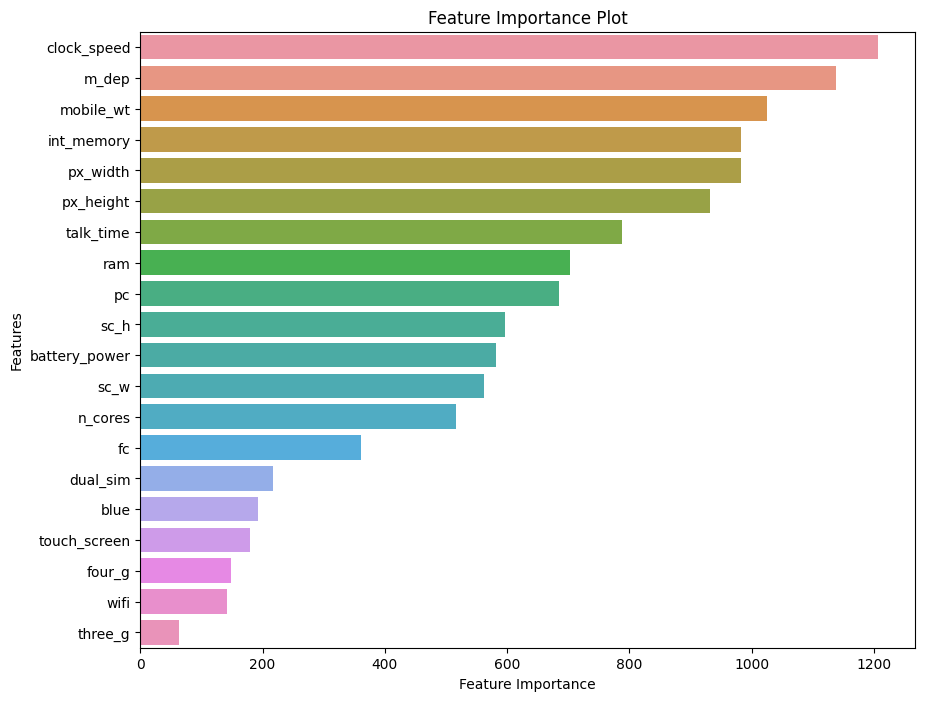

In [109]:
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances.values, y=feature_importances.index, orient='h')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title("Feature Importance Plot")
plt.show()

In [110]:
lg_pred = lg.predict(test.drop(["id"],axis = 1))

In [111]:
submission = pd.DataFrame({
    "id":test["id"],
    "price_range":lg_pred
})

In [112]:
submission.head()

,id,price_range
0,1,3
1,2,0
2,6,3
3,10,0
4,12,2


In [114]:
# Google Drive・Google Colaboratoryで作業する場合
submission.to_csv('submission.csv',header = False,index=False)

from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>